This is the code for building the predictor model for Sepsis prediction. very old data
Hence, I just use d2l python 3.9.23

# Robust health-score based survival prediction for a neonatal mouse model of polymicrobial sepsis

## Abstract
Infectious disease and sepsis represent a serious problem in early life. Much of the associated morbidity and mortality is presumed to relate to fundamental differences between neonatal and adult immunity. Mechanistic insight into the way newborns’ immune systems handle infectious threats is lacking; as a result, there has only been limited success in providing effective immunomodulatory interventions to reduce mortality. Given the complexity of the host-pathogen interactions, neonatal mouse models can offer potential avenues providing valuable data. However, the small size of neonatal mice hampers the ability to collect biological samples without sacrificing the animals. Further, the lack of a standardized metric to quantify mouse health increases reliance on correlative biomarkers without a known relationship to ‘clinical’ outcome. To address this bottleneck, we developed a system that allows assessment neonatal mouse health in a readily standardized and quantifiable manner. The resulting health scores require no special equipment or sample collection and can be assigned in less than 20 seconds. Importantly, the health scores are highly predictive of survival. A classifier constructed from the righting reflex and mobility revealed a positive relationship between bacterial load and survival, demonstrating how this scoring system can be used to bridge the gap between assumed relevance of biomarkers and the clinical outcome of interest. Adoption of this scoring system will not only provide a robust metric to assess health of newborn mice but allow for objective, prospective studies of infectious disease and possible interventions in early life.



## Analysis Environment 

This analysis was done using open source tools mainly.

- [Python Anaconda](https://www.continuum.io/downloads)
- [Jupyter Notebook](http://jupyter.org/)



## Methods 

The approach we adopted for the analysis of this dataset follows a standard methodology used in machine learning. We first begin by looking at the data, from a descriptive statistics perspective, then we try to visualize the dataset in order to have a general idea.

In order to apply any machine learning algorithm, we need to transform the data into a format that will minimize the error propagation due to the difference in the way different features were measured and reported. We apply several techniques like rescaling and normalization. This step is necessary to make sure our odels are accurate and generalizable.

We then need to take a look at our features one by one. We need to know what feature combination impact the most the performance of our models. TO do that, several techniques for feature selection exist, and we will apply some of them to our dataset in order to pick the most important ones to use in our models.

We will mainly be doing classification in this dataset, but we might do some regression as well. We will be applying different approaches to our data and measure the accuracy of our models to pick the winning solution.

The general approach in this notebook is summarized in the figure below:

![approach](./approach.png)

##  Data Cleaning

Let's start first by importing all libraries we need for the analysis, for reading the files, creating plots, performaing machine learning data analysis etc ..

在 Python 官方风格指南 PEP 8 中，并没有规定“必须先写 import 还是先写 from … import”；
它只要求分组且每组内按字典序排序：
1. 标准库模块
2. 第三方库模块
3. 本地应用/库模块

同一分组内，import 与 from … import 可以混排，只要字母顺序正确即可。例如：

import os                      # 标准库  
import numpy as np             # 第三方  

from pathlib import Path       # 标准库 from…  
from matplotlib import pyplot  # 第三方 from…  
from mypkg import utils        # 本地 from…  

##### Because this is 2019 colde , I ran it in python 3.9.23

In [2]:
# conda install -c conda-forge xgboost -y
# conda install -c conda-forge seaborn -y
# python -m pip uninstall -y numpy minepy -y  # minepy 的 二进制 wheel 是在 旧版 NumPy 下编译的，而你的当前 NumPy 版本太新，ABI 不兼容。
# or conda uninstall numpy --force
# conda install numpy=1.21 minepy -y # restart kernel after installation to take effect 
# conda update -c conda-forge matplotlib -y   
# conda remove pandas --force  
# conda install -c conda-forge pandas -y 

In [3]:
from matplotlib import MatplotlibDeprecationWarning as mplDeprecation

print(numpy.__file__) 返回 None 说明 Python 找到了一个叫 numpy 的模块，但它不是真正的 NumPy 库，而是：
你自己写的 numpy.py 文件，或
残留的 numpy 空目录 / 损坏包，导致 __file__ 属性缺失。
按下面 3 步清理并重新安装即可：
找到并删除「假 numpy」
在 当前报错的环境 里执行：

In [4]:
import numpy, sys, os; print(numpy.__file__)

c:\Users\zhen-\anaconda3\envs\DSp3.10\lib\site-packages\numpy\__init__.py


In [5]:
from numpy import arange
print(arange(5))                # [0 1 2 3 4]
#print(numpy.__file__)           # 应显示 …/envs/<名>/lib/python…/numpy/__init__.py

[0 1 2 3 4]


In [6]:
# 先单独测试 matplotlib
import matplotlib
print(matplotlib.__version__)
# 再测试 seaborn
import seaborn as sns
print(sns.__version__)

3.10.7
0.13.2


In [7]:
# Load libraries
from   numpy import arange
from   numpy import set_printoptions

import matplotlib
import pprint
import xgboost

import matplotlib.pyplot as plt #  same as: 
#from matplotlib import pyplot as plt  #<<========
import numpy             as np
import pandas            as pd 
import seaborn           as sns
from collections import defaultdict
#from minepy      import MINE
from string      import ascii_letters

from pandas                import read_csv
from pandas                import set_option
#from pandas.tools.plotting import scatter_matrix

# from sklearn                  import cross_validation    # deprecated
from sklearn.pipeline         import Pipeline
# from sklearn.grid_search      import GridSearchCV                         
# from sklearn.cross_validation import ShuffleSplit

# from sklearn               import preprocessing
# from sklearn.preprocessing import Imputer                            # deprecated
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import RandomizedLasso  # deprecated
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.tree         import DecisionTreeClassifier
from sklearn.tree         import DecisionTreeRegressor
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.svm          import SVR
from sklearn.svm          import SVC

from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB

#sns.set(style="white")
#plt.rcParams['figure.figsize'] = (40.0,30.0)


In [8]:
font = {'family' : 'Times New Roman',
        'size'   : 12}
def set_style():
    #plt.style.use(['white', 'paper'])
    sns.set_theme(style='white') 
    matplotlib.rc('font', **font)
    
def set_size(fig):
    fig.set_size_inches(10, 6)
    #plt.tight_layout()
    
set_style()

In [9]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore', category=FitFailedWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)




Now let's create the function to read and load the data

In [10]:
# Load the data set into a dataframe
df = pd.read_csv('./data/data_2018/NoScore_datetime.csv')


In [11]:
# Print dataset
df.head()

,Unnamed: 0,pupID,outcome,age.challenge,sex,chal.time,litterID,chal.status,weight.challenge,dob.pups,...,v24.energy.low,v24.righting.response.high,v24.righting.response.low,weight.change.0.24,weight.change.0.18,weight.change.18.24,direction.of.weight.change.18.24,change.righting.high,change.righting.low,removed
0,1,F2.m.G1.2015-08-20,die,8,m,7:34 PM,G1.2015-08-20,challenged,4.76,8/20/15,...,lethargic,rights,rights,-0.26,-0.135,-0.125,lose,ftr.to.rights,ftr.to.rights,keep
1,2,F3.m.G1.2015-08-20,die,8,m,7:34 PM,G1.2015-08-20,challenged,4.54,8/20/15,...,non mobile,ftr,ftr,-0.22,-0.105,-0.115,lose,rights.to.ftr,rights.to.ftr,keep
2,3,F4.f.G1.2015-08-20,live,8,f,7:34 PM,G1.2015-08-20,challenged,4.54,8/20/15,...,mobile,rights,rights,-0.30,-0.170,-0.130,lose,rights.to.rights,ftr.to.rights,keep
3,4,F1.m.F3.2015-08-27,live,9,m,8:00 PM,F3.2015-08-27,challenged,5.91,8/27/15,...,mobile,rights,rights,-0.20,-0.105,-0.095,lose,rights.to.rights,rights.to.rights,remove
4,5,F2.f.F3.2015-08-27,live,9,f,8:00 PM,F3.2015-08-27,challenged,6.06,8/27/15,...,mobile,rights,rights,-0.67,-0.420,-0.250,lose,rights.to.rights,rights.to.rights,remove


We have a dataset with 22 instances and 29 features  
Let's take a look at the types of each attribute

In [12]:
# Print data types for attributes

pd.set_option('display.max_rows', 600)
df.dtypes

Unnamed: 0                            int64
pupID                                object
outcome                              object
age.challenge                         int64
sex                                  object
chal.time                            object
litterID                             object
chal.status                          object
weight.challenge                    float64
dob.pups                             object
v18.hour.post.challenge             float64
v18.weight                          float64
v18.energy.high                      object
v18.energy.low                       object
v18.righting.response.high           object
v18.righting.response.low            object
v24.hour.post.challenge             float64
v24.weight                          float64
v24.energy.high                      object
v24.energy.low                       object
v24.righting.response.high           object
v24.righting.response.low            object
weight.change.0.24              

## Data Transformation

Dropping features that are not relevant for the analysis

In [13]:
df = df.drop(['Unnamed: 0', 'pupID', 'chal.time', 'litterID', 'dob.pups', 'removed'],  axis=1)

In [14]:
list(df)

['outcome',
 'age.challenge',
 'sex',
 'chal.status',
 'weight.challenge',
 'v18.hour.post.challenge',
 'v18.weight',
 'v18.energy.high',
 'v18.energy.low',
 'v18.righting.response.high',
 'v18.righting.response.low',
 'v24.hour.post.challenge',
 'v24.weight',
 'v24.energy.high',
 'v24.energy.low',
 'v24.righting.response.high',
 'v24.righting.response.low',
 'weight.change.0.24',
 'weight.change.0.18',
 'weight.change.18.24',
 'direction.of.weight.change.18.24',
 'change.righting.high',
 'change.righting.low']

In [15]:
df.head()

,outcome,age.challenge,sex,chal.status,weight.challenge,v18.hour.post.challenge,v18.weight,v18.energy.high,v18.energy.low,v18.righting.response.high,...,v24.energy.high,v24.energy.low,v24.righting.response.high,v24.righting.response.low,weight.change.0.24,weight.change.0.18,weight.change.18.24,direction.of.weight.change.18.24,change.righting.high,change.righting.low
0,die,8,m,challenged,4.76,16.93,4.625,mobile,mobile,ftr,...,lethargic,lethargic,rights,rights,-0.26,-0.135,-0.125,lose,ftr.to.rights,ftr.to.rights
1,die,8,m,challenged,4.54,16.93,4.435,lethargic,lethargic,rights,...,lethargic,non mobile,ftr,ftr,-0.22,-0.105,-0.115,lose,rights.to.ftr,rights.to.ftr
2,live,8,f,challenged,4.54,16.93,4.370,lethargic,mobile,rights,...,mobile,mobile,rights,rights,-0.30,-0.170,-0.130,lose,rights.to.rights,ftr.to.rights
3,live,9,m,challenged,5.91,16.33,5.805,lethargic,lethargic,rights,...,mobile,mobile,rights,rights,-0.20,-0.105,-0.095,lose,rights.to.rights,rights.to.rights
4,live,9,f,challenged,6.06,16.33,5.640,lethargic,lethargic,rights,...,mobile,mobile,rights,rights,-0.67,-0.420,-0.250,lose,rights.to.rights,rights.to.rights


We need to encode the data, see **Supplementary Material** document for additional information about the encoding used in this analysis

In [16]:
columns_to_encode = ['sex','chal.status','v18.energy.high','v18.energy.low','v18.righting.response.high','v18.righting.response.low','v24.energy.high','v24.energy.low','v24.righting.response.high','v24.righting.response.low','direction.of.weight.change.18.24','change.righting.high','change.righting.low']
df_encoded = pd.get_dummies(df, drop_first=True, columns=columns_to_encode)
df_encoded['outcome'] = pd.factorize(df_encoded['outcome'])[0]

Let's take a look at the 20 first rows of the dataset

In [17]:
#print first 20 rows
pd.set_option('display.max_columns', 80)
df_encoded.head(20)

,outcome,age.challenge,weight.challenge,v18.hour.post.challenge,v18.weight,v24.hour.post.challenge,v24.weight,weight.change.0.24,weight.change.0.18,weight.change.18.24,sex_m,chal.status_non challenged,v18.energy.high_mobile,v18.energy.high_non mobile,v18.energy.low_mobile,v18.energy.low_non mobile,v18.righting.response.high_rights,v18.righting.response.low_rights,v24.energy.high_mobile,v24.energy.high_non mobile,v24.energy.low_mobile,v24.energy.low_non mobile,v24.righting.response.high_rights,v24.righting.response.low_rights,direction.of.weight.change.18.24_lose,change.righting.high_ftr.to.rights,change.righting.high_rights.to.ftr,change.righting.high_rights.to.rights,change.righting.low_ftr.to.rights,change.righting.low_rights.to.ftr,change.righting.low_rights.to.rights
0,0,8,4.76,16.93,4.625,23.93,4.50,-0.26,-0.135,-0.125,True,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False
1,0,8,4.54,16.93,4.435,23.93,4.32,-0.22,-0.105,-0.115,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,1,8,4.54,16.93,4.370,23.93,4.24,-0.30,-0.170,-0.130,False,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,False,True,True,False,False
3,1,9,5.91,16.33,5.805,21.50,5.71,-0.20,-0.105,-0.095,True,False,False,False,False,False,True,True,True,False,True,False,True,True,True,False,False,True,False,False,True
4,1,9,6.06,16.33,5.640,21.50,5.39,-0.67,-0.420,-0.250,False,False,False,False,False,False,True,True,True,False,True,False,True,True,True,False,False,True,False,False,True
5,0,7,5.69,15.33,5.590,21.50,5.47,-0.22,-0.100,-0.120,True,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,True,False
6,0,7,3.80,16.25,3.780,21.50,3.70,-0.10,-0.020,-0.080,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
7,1,7,3.54,16.25,3.475,21.50,3.40,-0.14,-0.065,-0.075,False,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,False,False,True,False,False
8,0,8,4.90,20.00,4.525,27.33,4.44,-0.46,-0.375,-0.085,False,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False
9,0,8,5.20,20.00,4.875,27.33,4.78,-0.42,-0.325,-0.095,True,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False,False,True,False


Looking at the size of our dataset

In [18]:
df.shape

(222, 23)

After transforming the data we are curious to see how every feature is distributed across the entire dataset

In [19]:
# 只改「显示」精度（最常用）
pd.set_option('display.precision', 3)



The most important thing we want to see here prior to starting any analysis is how balanced this dataset is, so we will try to take a look at the dsitribution of the outcome, which is the class we want to predict with the score

In [20]:
# class distribution
df_encoded.groupby('outcome').size()

outcome
0    112
1    110
dtype: int64

As we can see here, although a small dataset, but it is perfectly **balanced**

We can now start Building our matrix for training by removing the outcome from the data

In [21]:
# Create our feature matrix
X = df_encoded.drop('outcome', axis=1)

# create our response variable
y = df_encoded['outcome']

# get our null accuracy rate
y.value_counts(normalize=True)


outcome
0    0.505
1    0.495
Name: proportion, dtype: float64

The baseline accuracy to beat is 50.5 %

## Model Training and Validation

We first start by setting up some functions that we will be using a lot in this notebook

In [22]:
## Function to evaluate a model, given some hyperparameters set, and a training data as well as expected outcome values

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,  # the model to grid search
                        params,  # the parameter set to try
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)  # fit the model and parameters
    # our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
   


<span style="color: magenta">  Instantiate our machine learning algorithms we will be using in this analysis </span>

In [23]:

lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gb = GradientBoostingClassifier()
xg = xgboost.XGBClassifier()


In [24]:
# Set up some parameters for our grid search

# Logistic Regression
lr_params = {'C': [1e-1, 1e0, 1e1, 1e2], 'penalty': ['l1', 'l2']}

# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7]}

# Decision Tree
tree_params = {'max_depth': [None, 1, 3, 5, 7]}

# Random Forest
forest_params = {'n_estimators': [
    10, 50, 100, 500, 1000], 'max_depth': [1, 3, 5, 7]}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': [10, 50, 100, 500, 1000],
    #'max_features': 0.2,
    'max_depth': [1, 3, 5, 7],
    'min_samples_leaf': [1,2,3,4,5]
}

# XGBoost
xg_params = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    # Parameters that we are going to tune.
    'max_depth': [1, 3, 5, 7],
    'min_child_weight': [1,2,3,4,5,6,7],
    'subsample': [1,2,3,4],
    'colsample_bytree': [1,2,3,4],
    # Other parameters
    'objective': ['reg:linear','binary:logistic'],
    
}


Let's test the function we just tested on all the algorithms we defined

In [25]:
list_of_algorithms = ["lr", "knn", "d_tree", "forest", "gb", "xg"]
#hyperparameters = ["lr_params", "knn_params", "tree_params", "forest_params", "gb_params", "xg_params"]

models_dict = {
    "lr":lr,
    "knn":knn,
    "d_tree": d_tree,
    "forest": forest,
    "gb": gb,
    "xg": xg    
}

hyperparameters_dict = {
    "lr":lr_params,
    "knn":knn_params,
    "d_tree": tree_params,
    "forest": forest_params,
    "gb": gb_params,
    "xg": xg_params     
}
def test_all_algorithms(list_of_algorithms, X, y):
    for alg,hyper in hyperparameters_dict.items():
        #print(alg,hyper)
        print("Testing "+alg)
        get_best_model_and_accuracy(models_dict[alg],hyper,X,y)
        
test_all_algorithms(list_of_algorithms, X,y)

Testing lr
Best Accuracy: 0.8201010101010102
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Testing knn
Best Accuracy: 0.802121212121212
Best Parameters: {'n_neighbors': 5}
Testing d_tree
Best Accuracy: 0.8196969696969697
Best Parameters: {'max_depth': 1}
Testing forest
Best Accuracy: 0.8829292929292929
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Testing gb
Best Accuracy: 0.8827272727272728
Best Parameters: {'max_depth': 1, 'min_samples_leaf': 2, 'n_estimators': 500}
Testing xg
Best Accuracy: 0.8828282828282827
Best Parameters: {'colsample_bytree': 1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 1}


### Impact of feature selection on model accuracy

#### Feature selection using Correlation 



In [26]:
df_encoded.corr()

,outcome,age.challenge,weight.challenge,v18.hour.post.challenge,v18.weight,v24.hour.post.challenge,v24.weight,weight.change.0.24,weight.change.0.18,weight.change.18.24,sex_m,chal.status_non challenged,v18.energy.high_mobile,v18.energy.high_non mobile,v18.energy.low_mobile,v18.energy.low_non mobile,v18.righting.response.high_rights,v18.righting.response.low_rights,v24.energy.high_mobile,v24.energy.high_non mobile,v24.energy.low_mobile,v24.energy.low_non mobile,v24.righting.response.high_rights,v24.righting.response.low_rights,direction.of.weight.change.18.24_lose,change.righting.high_ftr.to.rights,change.righting.high_rights.to.ftr,change.righting.high_rights.to.rights,change.righting.low_ftr.to.rights,change.righting.low_rights.to.ftr,change.righting.low_rights.to.rights
outcome,1.000,-0.017,0.110,0.127,1.310e-01,0.034,0.178,0.207,8.850e-02,0.299,-0.063,0.096,-0.002,-0.027,-0.017,1.154e-01,0.239,0.283,4.014e-01,-0.451,0.374,-2.988e-01,0.598,0.641,-0.368,9.240e-02,-0.373,0.482,0.269,-0.239,0.462
age.challenge,-0.017,1.000,0.416,-0.230,4.232e-01,0.143,0.409,-0.052,1.445e-02,-0.131,0.088,-0.103,-0.056,-0.007,-0.196,-6.544e-02,0.098,0.101,-4.303e-02,0.015,-0.105,1.331e-01,0.077,0.170,0.011,-3.157e-02,-0.004,0.093,0.094,0.015,0.100
weight.challenge,0.110,0.416,1.000,-0.056,9.750e-01,0.021,0.951,-0.222,-1.495e-01,-0.238,0.054,0.072,-0.152,-0.115,-0.254,-4.854e-02,0.273,0.257,-4.004e-03,-0.073,0.019,-1.262e-02,0.176,0.168,0.058,-1.083e-01,0.020,0.238,0.025,0.175,0.167
v18.hour.post.challenge,0.127,-0.230,-0.056,1.000,-7.797e-02,0.025,-0.040,0.054,-9.709e-02,0.259,-0.157,0.052,0.005,0.026,0.101,1.034e-01,0.173,0.108,4.774e-02,-0.002,0.076,-6.123e-02,0.104,0.097,-0.079,-9.807e-02,-0.008,0.165,-0.040,-0.054,0.152
v18.weight,0.131,0.423,0.975,-0.078,1.000e+00,-0.018,0.989,-0.022,7.403e-02,-0.157,0.072,0.094,-0.142,-0.140,-0.283,-4.277e-02,0.274,0.293,-8.303e-04,-0.082,0.008,-2.155e-02,0.200,0.186,-0.042,-1.092e-01,-0.011,0.261,0.007,0.173,0.207
v24.hour.post.challenge,0.034,0.143,0.021,0.025,-1.844e-02,1.000,-0.030,-0.162,-1.754e-01,-0.075,-0.020,-0.075,0.088,-0.073,0.153,-1.775e-01,-0.006,-0.125,9.658e-02,0.015,0.019,3.272e-02,-0.062,-0.032,0.020,6.260e-02,0.138,-0.102,0.194,0.155,-0.236
v24.weight,0.178,0.409,0.951,-0.040,9.887e-01,-0.030,1.000,0.090,1.305e-01,-0.008,0.070,0.121,-0.135,-0.140,-0.296,-3.125e-02,0.292,0.338,1.919e-02,-0.099,0.013,-2.330e-02,0.228,0.228,-0.152,-1.151e-01,-0.031,0.291,-0.006,0.154,0.269
weight.change.0.24,0.207,-0.052,-0.222,0.054,-2.217e-02,-0.162,0.090,1.000,8.951e-01,0.743,0.046,0.149,0.064,-0.071,-0.116,5.792e-02,0.042,0.237,7.357e-02,-0.077,-0.019,-3.290e-02,0.154,0.181,-0.666,-1.423e-02,-0.161,0.151,-0.099,-0.079,0.309
weight.change.0.18,0.088,0.014,-0.150,-0.097,7.403e-02,-0.175,0.130,0.895,1.000e+00,0.366,0.076,0.094,0.051,-0.105,-0.120,2.753e-02,-0.005,0.148,1.427e-02,-0.038,-0.049,-3.921e-02,0.102,0.077,-0.446,3.281e-04,-0.139,0.093,-0.080,-0.014,0.171
weight.change.18.24,0.299,-0.131,-0.238,0.259,-1.574e-01,-0.075,-0.008,0.743,3.663e-01,1.000,-0.018,0.170,0.058,0.009,-0.062,7.954e-02,0.095,0.272,1.321e-01,-0.104,0.033,-9.765e-03,0.168,0.261,-0.720,-3.019e-02,-0.127,0.176,-0.086,-0.143,0.389


<Axes: >

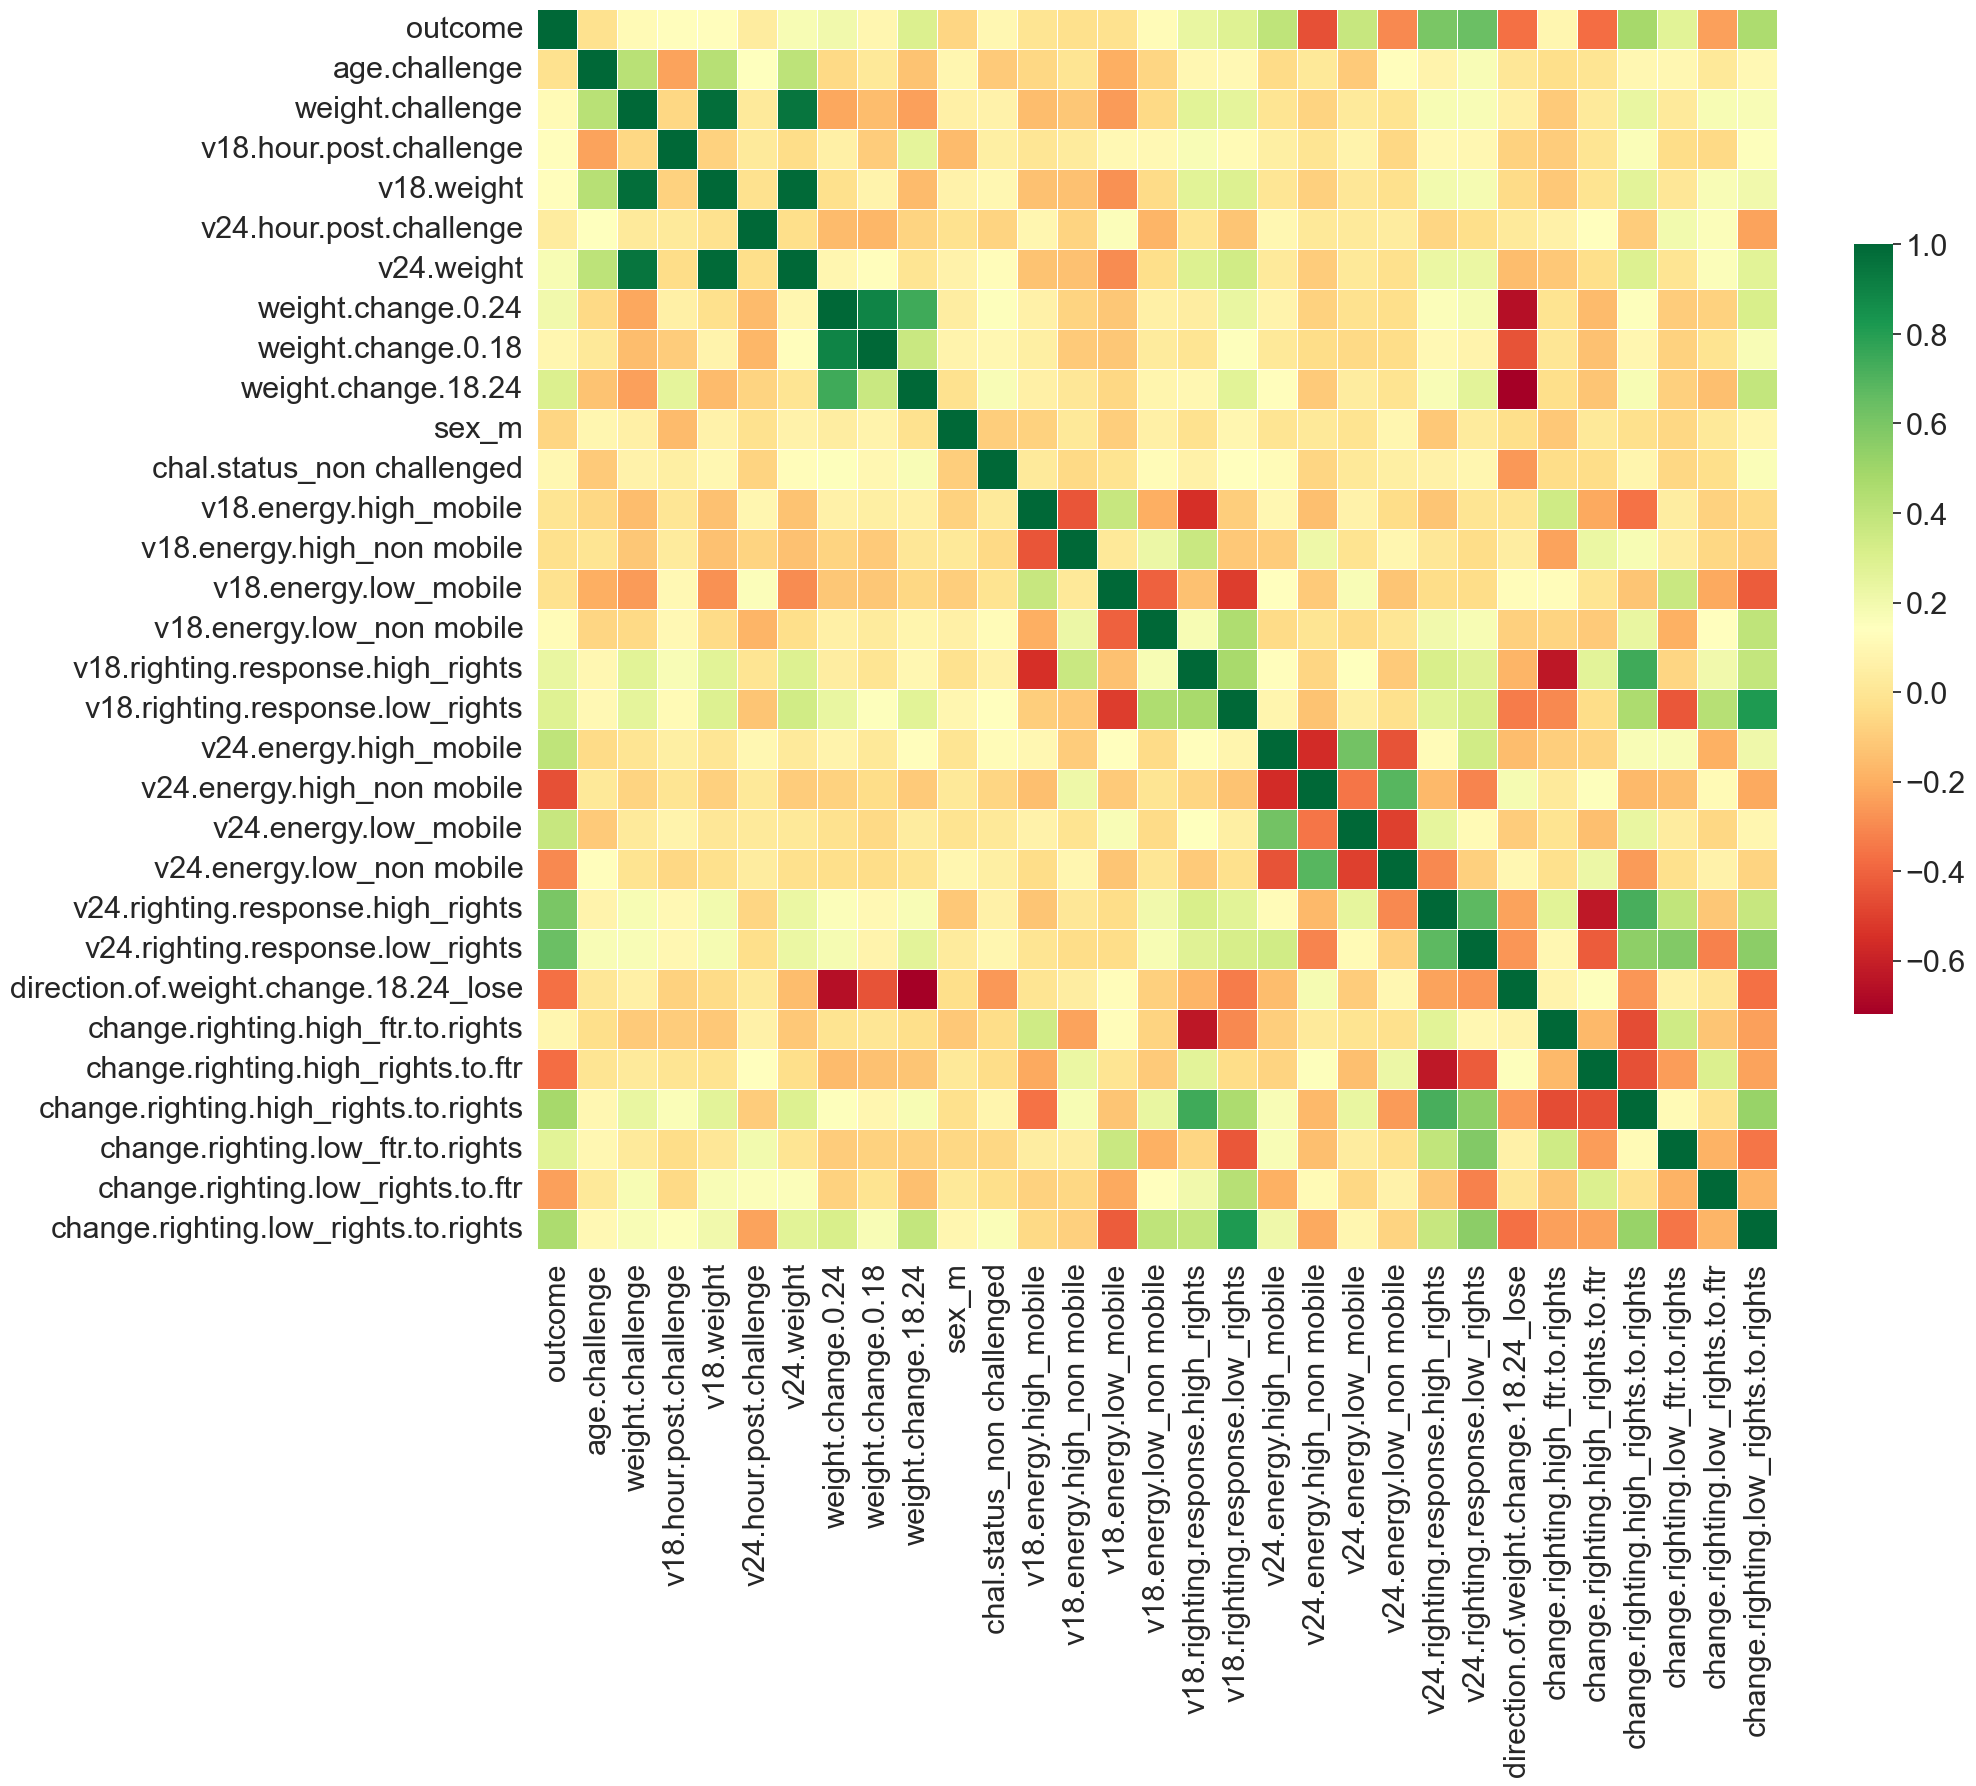

In [27]:
#import matplotlib.style as style
#style.use('seaborn')
sns.set_theme(font_scale=2)
plt.figure(figsize=(20,20))
sns.heatmap(df_encoded.corr(), vmax=1,
            square=True,linewidths=.5,
            cbar_kws={"shrink": .5}, cmap='RdYlGn')

In [28]:
df_encoded.corr()['outcome']

outcome                                  1.000
age.challenge                           -0.017
weight.challenge                         0.110
v18.hour.post.challenge                  0.127
v18.weight                               0.131
v24.hour.post.challenge                  0.034
v24.weight                               0.178
weight.change.0.24                       0.207
weight.change.0.18                       0.088
weight.change.18.24                      0.299
sex_m                                   -0.063
chal.status_non challenged               0.096
v18.energy.high_mobile                  -0.002
v18.energy.high_non mobile              -0.027
v18.energy.low_mobile                   -0.017
v18.energy.low_non mobile                0.115
v18.righting.response.high_rights        0.239
v18.righting.response.low_rights         0.283
v24.energy.high_mobile                   0.401
v24.energy.high_non mobile              -0.451
v24.energy.low_mobile                    0.374
v24.energy.lo

In [29]:
df_encoded.corr()["outcome"] > .2


outcome                                   True
age.challenge                            False
weight.challenge                         False
v18.hour.post.challenge                  False
v18.weight                               False
v24.hour.post.challenge                  False
v24.weight                               False
weight.change.0.24                        True
weight.change.0.18                       False
weight.change.18.24                       True
sex_m                                    False
chal.status_non challenged               False
v18.energy.high_mobile                   False
v18.energy.high_non mobile               False
v18.energy.low_mobile                    False
v18.energy.low_non mobile                False
v18.righting.response.high_rights         True
v18.righting.response.low_rights          True
v24.energy.high_mobile                    True
v24.energy.high_non mobile               False
v24.energy.low_mobile                     True
v24.energy.lo

In [30]:
highly_correlated_features = df_encoded.columns[df_encoded.corr()['outcome'].abs() > .2] # Correlation threshold set to 0.2 
list(highly_correlated_features)

['outcome',
 'weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']

In [31]:
highly_correlated_features = highly_correlated_features.drop('outcome')
highly_correlated_features

# only include the five highly correlated features
X_subsetted = X[highly_correlated_features]
#get_best_model_and_accuracy(xg, xg_params, X_subsetted, y)

Now after selecting the set of features wwe want to work with we can run the same function as before but with another training dataset this time, only containing features selected after correlation

In [32]:
test_all_algorithms(list_of_algorithms, X_subsetted,y)

Testing lr
Best Accuracy: 0.8784848484848485
Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Testing knn
Best Accuracy: 0.8334343434343434
Best Parameters: {'n_neighbors': 5}
Testing d_tree
Best Accuracy: 0.8420202020202019
Best Parameters: {'max_depth': 3}
Testing forest
Best Accuracy: 0.8736363636363637
Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Testing gb
Best Accuracy: 0.8918181818181818
Best Parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 100}
Testing xg
Best Accuracy: 0.8919191919191919
Best Parameters: {'colsample_bytree': 1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1}


Below is a reminder of what we had without feature selection

Testing lr  
Best Accuracy: 0.8603603603603603  
Best Parameters: {'C': 1.0, 'penalty': 'l1'}  
Testing knn  
Best Accuracy: 0.8243243243243243  
Best Parameters: {'n_neighbors': 5}  
Testing d_tree  
Best Accuracy: 0.8198198198198198  
Best Parameters: {'max_depth': 1}  
Testing forest  
Best Accuracy: 0.8783783783783784  
Best Parameters: {'max_depth': 7, 'n_estimators': 500}  
Testing gb  
Best Accuracy: 0.8828828828828829  
Best Parameters: {'max_depth': 1, 'min_samples_leaf': 2, 'n_estimators': 100}  
Testing xg  
Best Accuracy: 0.8828828828828829  
Best Parameters: {'colsample_bytree': 1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 1}  


The problem with this method is that we are setting the threshold as 0.2 arbitrarily, but we need a better way of automatically detect the best threshold that gives the better result. Luckily, we can proceed with the same manner as for estimating the best hyperparameters. For this we need to write additional functions, and leverage the This text is blue.This text is blue.This text is blue.<span style="color: cyan"> **pipeline**  </span> capability of scikitlearn

In [33]:

from sklearn.base import TransformerMixin, BaseEstimator


class CustomCorrelationChooser(TransformerMixin, BaseEstimator):

    def __init__(self, response, cols_to_keep=[], threshold=None):
        # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
        # initialize a variable that will eventually
        # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep

    def transform(self, X):
        # the transform method simply selects the appropiate
        # columns from the original dataset
        return X[self.cols_to_keep]
        

    def fit(self, X, *_):
        # create a new dataframe that holds both features and response
        df = pd.concat([X, self.response], axis=1)
        # store names of columns that meet correlation threshold
        self.cols_to_keep = df.columns[df.corr(
        )[df.columns[-1]].abs() > self.threshold]
        # only keep columns in X, for example, will remove response variable
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        
        return self


In [ ]:
import copy

# instantiate our feature selector with the response variable set
# testing the method for Decision Classifier to validate first

tree_pipe_params = {
    'classifier__max_depth': [None, 1, 3, 5, 7]
}

ccc = CustomCorrelationChooser(response=y)

# make our new pipeline, including the selector <<=====================================================
ccc_pipe = Pipeline([('correlation_select', ccc),
                     ('classifier', d_tree)])

# make a copy of the decisino tree pipeline parameters
ccc_pipe_params = copy.deepcopy(tree_pipe_params)

# update that dictionary with feature selector specific parameters
ccc_pipe_params.update({
    'correlation_select__threshold': [0, .1, .2, .3]})

# {'correlation_select__threshold': [0, 0.1, 0.2, 0.3], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
pprint.pprint(ccc_pipe_params)
#print ccc.cols_to_keep

# better than original (by a little, and a bit faster on
# average overall
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

ccc = CustomCorrelationChooser(threshold=.2, response=y)
ccc.fit(X)
print("Important Features Kept:")
pprint.pprint(ccc.cols_to_keep)

{'classifier__max_depth': [None, 1, 3, 5, 7],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8336363636363636
Best Parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.3}
Important Features Kept:
['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']


We see that this is working as expected, so we will reproduce the same method for all algorithms used

In [35]:
lr_pipe_params = {'classifier__{}'.format(k): v for k, v in lr_params.items()}

knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}

dt_pipe_params = {'classifier__{}'.format(k): v for k, v in tree_params.items()}

forest_pipe_params = {'classifier__{}'.format(k): v for k, v in forest_params.items()}

gb_pipe_params = {'classifier__{}'.format(k): v for k, v in gb_params.items()}

xg_pipe_params = {'classifier__{}'.format(k): v for k, v in xg_params.items()}

In [36]:
import pprint

In [37]:
def test_all_classifiers(classifier_name, classifier_var, classifier_params):
    ccc = CustomCorrelationChooser(response=y)
    # make our new pipeline, including the selector
    ccc_pipe = Pipeline([('correlation_select', ccc), ('classifier', classifier_var)])
    ccc_pipe_params = copy.deepcopy(classifier_params)
    ccc_pipe_params.update({'correlation_select__threshold': [0, .1, .2, .3]})
    pprint.pprint("Classifier :" + classifier_name)
    pprint.pprint(ccc_pipe_params)
    get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

In [38]:
test_all_classifiers("Decision Tree",       d_tree, dt_pipe_params    )
test_all_classifiers("Logistic Regression", lr,     lr_pipe_params    )
test_all_classifiers("KNN",                 knn,    knn_pipe_params   )
test_all_classifiers("Random Forest",       forest, forest_pipe_params)
test_all_classifiers("Gradient Boosting",   gb,     gb_pipe_params    )
test_all_classifiers("XG Boost",            xg,     xg_pipe_params   )

'Classifier :Decision Tree'
{'classifier__max_depth': [None, 1, 3, 5, 7],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8336363636363636
Best Parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.3}
'Classifier :Logistic Regression'
{'classifier__C': [0.1, 1.0, 10.0, 100.0],
 'classifier__penalty': ['l1', 'l2'],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8782828282828282
Best Parameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'correlation_select__threshold': 0.3}
'Classifier :KNN'
{'classifier__n_neighbors': [1, 3, 5, 7],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8379797979797979
Best Parameters: {'classifier__n_neighbors': 7, 'correlation_select__threshold': 0.3}
'Classifier :Random Forest'
{'classifier__max_depth': [1, 3, 5, 7],
 'classifier__n_estimators': [10, 50, 100, 500, 1000],
 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.873939393939393

One interesting observation we can see here, is that except for GBM and Random Forest, the majority of algorithms are performing better with a correlation threshold set to 0.2, which we will chose with XGboost as giving the best combination

let's see what are the features of interest here

In [39]:
ccc = CustomCorrelationChooser(threshold=0.2, response=y)
ccc.fit(X)
print("Important Features Kept:")
pprint.pprint(ccc.cols_to_keep)


Important Features Kept:
['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']


#### Feature selection using Hypothesis testing (See Supplementry Material for more details) 


Same as above we will use a Pipeline, to get hyperparameters and feature selection best combination

<span style="color: yellow" >   *Let's test with XGBoost*  =========== 2 of the MOST important algotritms for strucured data  .</span>   
<span style="color: green">   *88 min !!!!*  =========== 2 of the MOST important algotritms for strucured data  .</span> 

In [42]:

# SelectKBest selects features according to the k highest scores of a
# given scoring function
from copy import *
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),
                          ('classifier', xg)])

select_k_best_pipe_params = deepcopy(xg_pipe_params)
# the 'all' literally does nothing to subset
select_k_best_pipe_params.update({'k_best__k': list(range(1, 20))})

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8918181818181818
Best Parameters: {'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 50, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'k_best__k': 14}


As we can see in the results above, value of `k` turns out to be optimal at 16, we can easily get these features into a table and sort them by pvalues to get the most important one first

In [43]:
k_best = SelectKBest(f_classif, k=16)
k_best.fit_transform(X, y)
# lowest 16 pvalues match what our custom correlationchooser chose before
p_values = pd.DataFrame(
    {'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

list(p_values.head(16)['column'])
p_values

,column,p_value
22,v24.righting.response.low_rights,4.699e-27
21,v24.righting.response.high_rights,6.341e-23
26,change.righting.high_rights.to.rights,2.621e-14
29,change.righting.low_rights.to.rights,4.086e-13
18,v24.energy.high_non mobile,1.524e-12
17,v24.energy.high_mobile,5.319e-10
19,v24.energy.low_mobile,8.490e-09
25,change.righting.high_rights.to.ftr,9.531e-09
23,direction.of.weight.change.18.24_lose,1.665e-08
20,v24.energy.low_non mobile,5.867e-06


Let's generalize with the rest of all the models to see how the value of `k` changes 

<span style="color: violet">   *40 min !!!!*  Before Forest   .</span>   
<span style="color: gold">   *40 min !!!!*  gb  2 of the MOST important algotritms for strucured data  .  </span>   
<span style="color: orange">   *68 min !!!!*  xg  2 of the MOST important algotritms for strucured data  .  </span> 

Total 148min

In [45]:
all_pipe_params = {
    
    "lr":     lr_pipe_params,
    "knn":    knn_pipe_params,
    "d_tree": dt_pipe_params,
    "forest": forest_pipe_params,
    "gb":     gb_pipe_params,
    "xg":     xg_pipe_params    
    
}

def test_models_with_k(X,y):
    
    for alg,pipe_params in all_pipe_params.items():
        # f_classif allows for negative values, not all do
        k_best = SelectKBest(f_classif)
        # Make a new pipeline with SelectKBest
        select_k_pipe = Pipeline([('k_best', k_best),('classifier', models_dict[alg])])
        select_k_best_pipe_params = deepcopy(pipe_params)
        select_k_best_pipe_params.update({'k_best__k': list(range(1, 20))})
        # comparable to our results with correlationchooser
        print("Testing "+alg)
        get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)
        

test_models_with_k(X,y)

Testing lr
Best Accuracy: 0.8828282828282829
Best Parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l2', 'k_best__k': 13}
Testing knn
Best Accuracy: 0.8648484848484849
Best Parameters: {'classifier__n_neighbors': 7, 'k_best__k': 8}
Testing d_tree
Best Accuracy: 0.8516161616161616
Best Parameters: {'classifier__max_depth': 5, 'k_best__k': 10}
Testing forest
Best Accuracy: 0.8783838383838385
Best Parameters: {'classifier__max_depth': 7, 'classifier__n_estimators': 1000, 'k_best__k': 19}
Testing gb
Best Accuracy: 0.8918181818181818
Best Parameters: {'classifier__max_depth': 1, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100, 'k_best__k': 14}
Testing xg
Best Accuracy: 0.8918181818181818
Best Parameters: {'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 50, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'k_best__k': 14}


The best combination gives XGBoost as a winner again for this classification, with the 16 best features previousely displayed (see table above with pvalues).

#### Feature selection using a machine learning algorithm (See Supplementry Material for more details) 


Similarily to the method before, we are using *pipeline* to combine feature selection and hyperparameter optimization using GridSearch

<span style="color: magenta">   *20 min !!!!*  Before Forest   .</span>   
<span style="color: lightgreen" >   *40 min !!!!*  gb  2 of the MOST important algotritms for strucured data  .  /span>   
<span style="color: gold">   *68 min !!!!*  xg  2 of the MOST important algotritms for strucured data  .  </span> 

Total 276 min ！！！！


#### 3 小时还没有完成，从电脑上设置不允许进入休眠模式。强制运行

In [ ]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())

for alg,pipe_params in all_pipe_params.items():
    svc_pipe = Pipeline([('select', svc_selector),('classifier', models_dict[alg])])
    svc_pipe_params = deepcopy(pipe_params)


    svc_pipe_params.update({
        'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
        
        'select__estimator__penalty': ['l1', 'l2'],
        'select__estimator__loss': ['squared_hinge', 'hinge'],
        'select__estimator__dual': [True, False]
    })

    print("Tetsing "+alg+"...")
    get_best_model_and_accuracy(svc_pipe,svc_pipe_params,X, y)





Tetsing lr...
Best Accuracy: 0.8737373737373737
Best Parameters: {'classifier__C': 100.0, 'classifier__penalty': 'l2', 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': '2.*mean'}
Tetsing knn...
Best Accuracy: 0.8467676767676767
Best Parameters: {'classifier__n_neighbors': 7, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': '2.*mean'}
Tetsing d_tree...
Best Accuracy: 0.855959595959596
Best Parameters: {'classifier__max_depth': None, 'select__estimator__dual': True, 'select__estimator__loss': 'hinge', 'select__estimator__penalty': 'l2', 'select__threshold': '2.*mean'}
Tetsing forest...
Best Accuracy: 0.8827272727272728
Best Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 10, 'select__estimator__dual': True, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l2', 'select__thr

In [49]:
#apply_params of XGboost

# set the optimal params to the pipeline
svc_pipe.set_params(**{'classifier__colsample_bytree': 1, 'classifier__max_depth': 1, 'classifier__min_child_weight': 6, 'classifier__n_estimators': 100, 'classifier__objective': 'binary:logistic', 'classifier__subsample': 1, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l2', 'select__threshold': 0.1})

# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['age.challenge', 'v24.hour.post.challenge', 'v24.weight',
       'weight.change.0.24', 'weight.change.18.24', 'sex_m',
       'v18.energy.high_mobile', 'v18.energy.high_non mobile',
       'v18.energy.low_non mobile', 'v18.righting.response.low_rights',
       'v24.energy.high_non mobile', 'v24.energy.low_mobile',
       'v24.energy.low_non mobile', 'v24.righting.response.high_rights',
       'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.high_rights.to.ftr',
       'change.righting.high_rights.to.rights',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='object')

## Prediction

#### The best performance comes from a XGBOOST optimized with Feature selected based on correlation

```json
{
    'classifier__colsample_bytree': [1, 2, 3, 4],
    'classifier__subsample': [1, 2, 3, 4],
    'correlation_select__threshold': [0, 0.1, 0.2, 0.3],
    'classifier__n_estimators': [10, 50, 100, 500, 1000],
    'classifier__min_child_weight': [1, 2, 3, 4, 5, 6, 7],
    'classifier__max_depth': [1, 3, 5, 7],
    'classifier__objective': ['reg:linear', 'binary:logistic']
}
Best Accuracy: 0.891891891892
Best Parameters: {
    'classifier__colsample_bytree': 1,
    'classifier__subsample': 1,
    'correlation_select__threshold': 0.2,
    'classifier__n_estimators': 100,
    'classifier__min_child_weight': 3,
    'classifier__max_depth': 1,
    'classifier__objective': 'binary:logistic'
}
```

## Time to make Prediction

In [50]:
## all the features

names = X.columns

In [51]:
names

Index(['age.challenge', 'weight.challenge', 'v18.hour.post.challenge',
       'v18.weight', 'v24.hour.post.challenge', 'v24.weight',
       'weight.change.0.24', 'weight.change.0.18', 'weight.change.18.24',
       'sex_m', 'chal.status_non challenged', 'v18.energy.high_mobile',
       'v18.energy.high_non mobile', 'v18.energy.low_mobile',
       'v18.energy.low_non mobile', 'v18.righting.response.high_rights',
       'v18.righting.response.low_rights', 'v24.energy.high_mobile',
       'v24.energy.high_non mobile', 'v24.energy.low_mobile',
       'v24.energy.low_non mobile', 'v24.righting.response.high_rights',
       'v24.righting.response.low_rights',
       'direction.of.weight.change.18.24_lose',
       'change.righting.high_ftr.to.rights',
       'change.righting.high_rights.to.ftr',
       'change.righting.high_rights.to.rights',
       'change.righting.low_ftr.to.rights',
       'change.righting.low_rights.to.ftr',
       'change.righting.low_rights.to.rights'],
      dtype='obje

In [52]:

selected_features = ['weight.change.0.24', 'weight.change.18.24', 'v18.righting.response.high_rights', 'v18.righting.response.low_rights', 'v24.energy.high_mobile', 'v24.energy.high_non mobile', 'v24.energy.low_mobile', 'v24.energy.low_non mobile', 'v24.righting.response.high_rights', 'v24.righting.response.low_rights', 'direction.of.weight.change.18.24_lose', 'change.righting.high_rights.to.ftr', 'change.righting.high_rights.to.rights', 'change.righting.low_ftr.to.rights', 'change.righting.low_rights.to.ftr', 'change.righting.low_rights.to.rights']


In [53]:
pprint.pprint(selected_features)

['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']


In [54]:
#Create a version of the initial input with only relevant features
X_selected_features = X[selected_features]

In [55]:
# Split the data set into training and Testing data

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.33, random_state=1)

## *Fitting Base Line Models*


Let's prepare some functions we will use for generating useful plots for our prediction task

### *Learning Curve*

In [58]:
# from sklearn.learning_curve import learning_curve # deprecated << ==
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    fig=plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=10, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(loc="lower right")
    #plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title, fontsize=14)
    set_size(fig)

training the base line models

In [ ]:
!conda install -c conda-forge mlxtend -y

^C


LR: 0.891905 (0.061281)
NB: 0.830476 (0.114111)
RF: 0.877619 (0.060461)


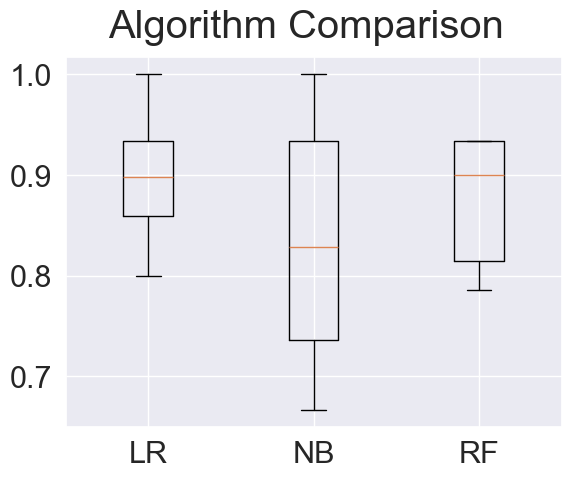

In [63]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 假设你已经定义了X_train, y_train等变量

def base_line_models(X_train, y_train):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    results = []
    names = []
    scoring = 'accuracy'
    training_set = X_train
    outcome = y_train

    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    # 绘制结果的箱线图
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

# 示例参数
num_instances = len(X_train)
num_folds = 10
seed = 7

# 调用函数
base_line_models(X_train, y_train)


In [ ]:

# from mlxtend.classifier import EnsembleVoteClassifier
# from mlxtend.data import iris_data
# from mlxtend.plotting import plot_decision_regions

# def base_line_models(training_set, outcome):
#     # Test options and evaluation metric
#     num_folds = 10
#     num_instances = len(training_set)
#     seed = 7
#     scoring = 'accuracy'

#     # Spot-Check Algorithms
#     models = []
#     models.append(('Logistic Regression', LogisticRegression(C=1.0, penalty='l2')))
#     #models.append(('LDA', LinearDiscriminantAnalysis()))
#     models.append(('k Nearest Neighbors', KNeighborsClassifier(n_neighbors=7)))
#     models.append(('Decision Tree', DecisionTreeClassifier(max_depth=5)))
#     #models.append(('NB', GaussianNB()))
#     #models.append(('SVM', SVC()))
#     results = []
#     names = []
#     for name, model in models:
#         # 在较新的scikit-learn版本中，cross_validation模块已经被整合到model_selection模块中。
#         kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
#         cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)
#         plot_learning_curve(model, name, training_set, outcome, ylim=(0.5, 1.01), cv=10)
#     # Compare Algorithms
#     fig = plt.figure(figsize=(10,6))
#     fig.suptitle('Baseline Algorithms Comparison', fontsize=14)
#     ax = fig.add_subplot(111)
#     plt.ylim((0.5,1.1))
#     plt.boxplot(results)
#     ax.set_xticklabels(names, fontsize=12)
#     #set_size(fig)
#     plt.show()

# base_line_models(X_train, y_train)

## *Fitting Ensemble Models*


Ensemble: 0.857619 (0.092642)


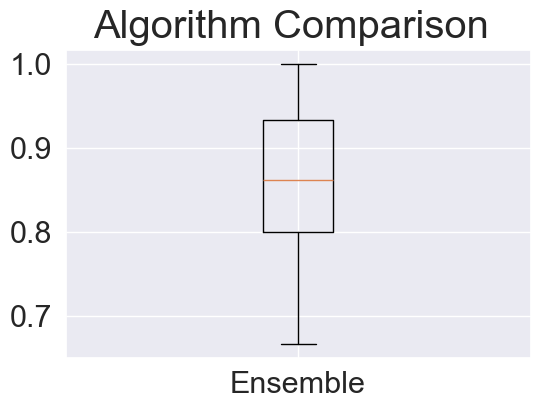

In [65]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 假设你已经定义了X_train, y_train等变量

def set_size(fig, width=6, height=4):
    fig.set_size_inches(width, height)

def ensemble_models(X_train, y_train):
    # 定义基模型
    clf1 = LogisticRegression()
    clf2 = GaussianNB()
    clf3 = RandomForestClassifier()
    
    # 定义集成模型
    ensemble = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')
    
    # 模型列表
    ensembles = []
    ensembles.append(('Ensemble', ensemble))
    
    results = []
    names = []
    scoring = 'accuracy'
    training_set = X_train
    outcome = y_train

    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    # 绘制结果的箱线图
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    set_size(fig)
    plt.show()

# 示例参数
num_instances = len(X_train)
num_folds = 10
seed = 7

# 假设你已经加载了数据并定义了X_train, y_train
# X_train, y_train = ...

# 调用函数
ensemble_models(X_train, y_train)


In [ ]:
# def ensemble_models(training_set, outcome):
#     # Test options and evaluation metric
#     num_folds = 10
#     num_instances = len(training_set)
#     seed = 7
#     scoring = 'accuracy'

#     # ensembles
#     ensembles = []
#     ensembles.append(('Gradient Boosting Machine ', GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)))
#     ensembles.append(('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=5)))
#     ensembles.append(('XGBoost', xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')))
#     results = []
#     names = []
#     for name, model in ensembles:
#         kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
#         cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)
#         plot_learning_curve(model, name, training_set, outcome, ylim=(0.5, 1.01), cv=10)

#     # Compare Algorithms
#     fig = plt.figure()
#     fig.suptitle('Ensemble Algorithms Comparison', fontsize=14)
#     ax = fig.add_subplot(111)
#     plt.ylim((0.5,1.1))
#     plt.boxplot(results)
#     ax.set_xticklabels(names, fontsize=14)
#     set_size(fig)
#     plt.show()

# ensemble_models(X_train, y_train)

These reuslts show clearly that ensemble models are much better tan the baseline ones. That said after training and fitting the models, GBM shows a better performance than XGboost.

Overall we have a very good performance from all classifiers.



## *Fitting an Ensemble - Stacking* (tested but not reported in the paper)

Stacking: 0.884762 (0.067673)


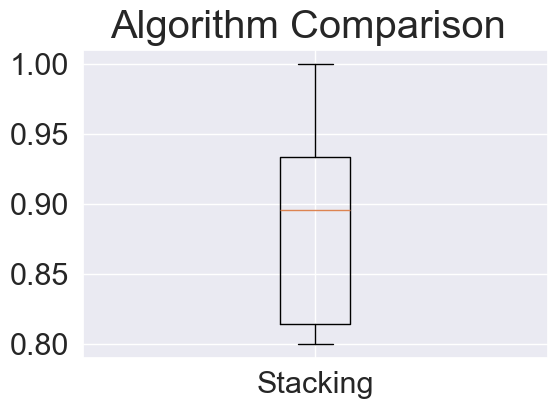

In [67]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

# 假设你已经定义了X_train, y_train等变量

def set_size(fig, width=6, height=4):
    fig.set_size_inches(width, height)

def stacking_models(X_train, y_train):
    # 定义基模型
    clf1 = LogisticRegression()
    clf2 = GaussianNB()
    clf3 = RandomForestClassifier()
    
    # 定义堆叠模型
    stack = StackingClassifier(
        estimators=[('lr', clf1), ('gnb', clf2), ('rf', clf3)],
        final_estimator=LogisticRegression()
    )
    
    # 模型列表
    models = []
    models.append(('Stacking', stack))
    
    results = []
    names = []
    scoring = 'accuracy'
    training_set = X_train
    outcome = y_train

    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    # 绘制结果的箱线图
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    set_size(fig)
    plt.show()

# 示例参数
num_instances = len(X_train)
num_folds = 10
seed = 7

# 假设你已经加载了数据并定义了X_train, y_train
# X_train, y_train = ...

# 调用函数
stacking_models(X_train, y_train)


In [ ]:
# from mlxtend.classifier import EnsembleVoteClassifier
# from mlxtend.data import iris_data
# from mlxtend.plotting import plot_decision_regions

# def stacking_models(training_set, outcome):
#     # Test options and evaluation metric
#     num_folds = 10
#     num_instances = len(training_set)
#     seed = 7
#     scoring = 'accuracy'

#     # Spot-Check Algorithms
#     models = []
#     clf1 = LogisticRegression(C=1.0, penalty='l2')
#     clf2 = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)
#     clf3 = xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')
    
#     eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
#                               weights=[1, 2, 2], voting='soft')
#     models.append(('Logistic Regression', clf1))
#     models.append(('Gradient Boosting', clf2))
#     models.append(('XGBoost', clf3))
#     models.append(('Ensemble Classifier', eclf))
#     results = []
#     names = []
#     for name, model in models:
#         kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
#         cv_results = cross_validation.cross_val_score(model, training_set, outcome, cv=kfold, scoring=scoring)
#         results.append(cv_results)
#         names.append(name)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)
#         plot_learning_curve(model, name, training_set, outcome, ylim=(0.5, 1.01), cv=10)
#     # Compare Algorithms
#     fig = plt.figure()
#     fig.suptitle('Stacking Classifiers')
#     ax = fig.add_subplot(111)
#     plt.ylim((0.5,1.1))
#     plt.boxplot(results)
#     ax.set_xticklabels(names)
#     set_size(fig)
#     plt.show()

# stacking_models(X_train, y_train)

## Model Validations

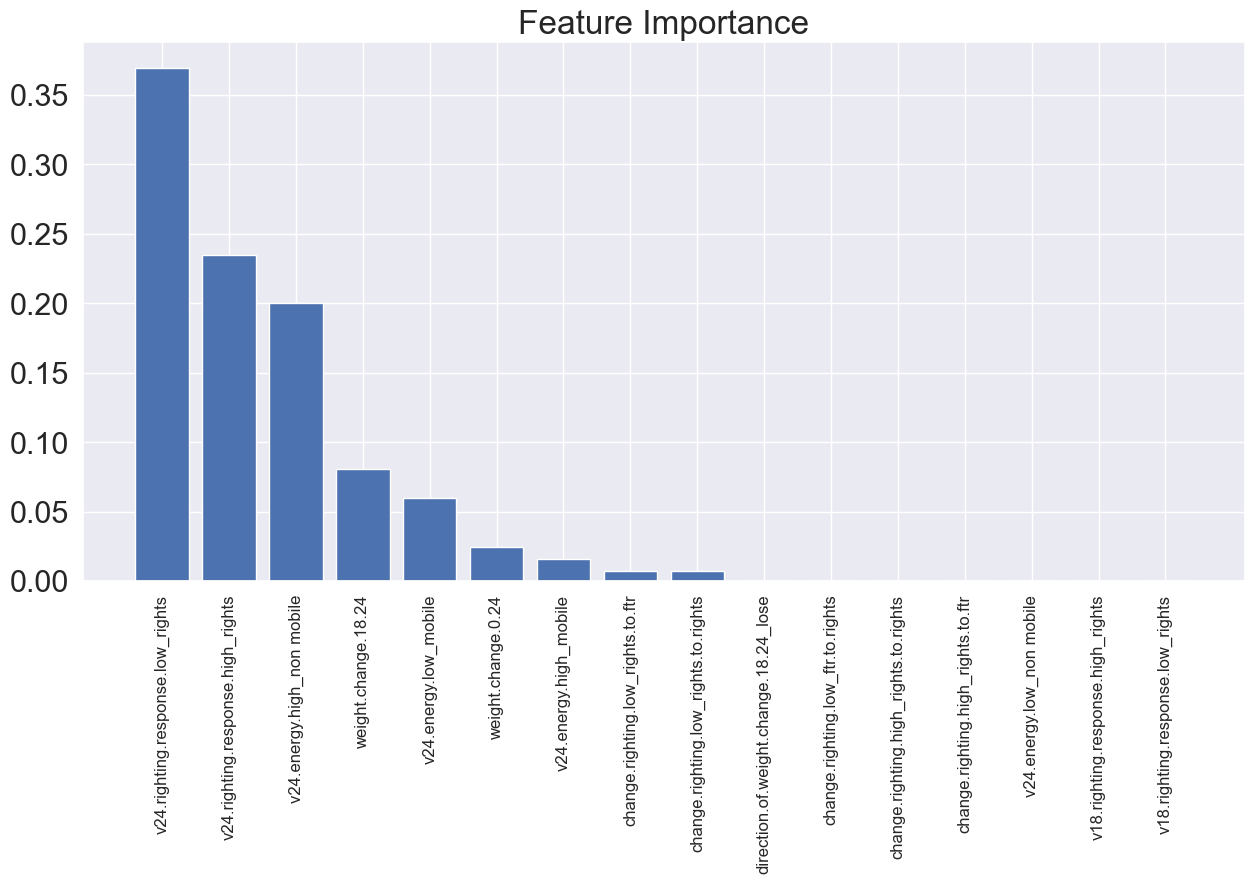

In [68]:
modelplot = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)
modelplot.fit(X_train, y_train)


# Calculate feature importances
importances = modelplot.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_sorted = [X_train.columns[i] for i in indices]

fig = plt.figure(figsize=(15,7))
# Barplot: Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names_sorted, rotation=90, fontsize = 12)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

Validation based on LR
0.8243243243243243
[[33  6]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.82      0.80      0.81        35

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



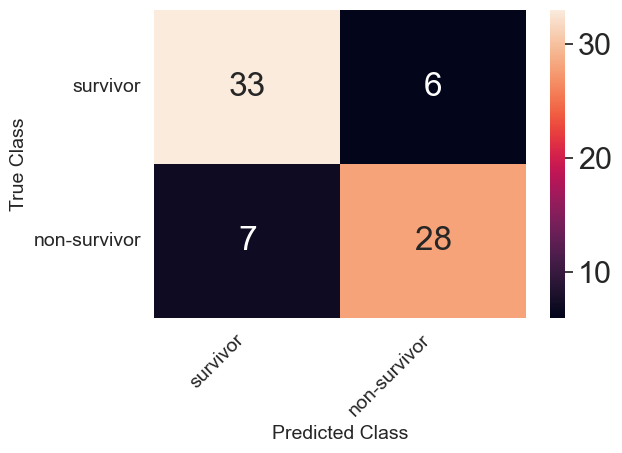

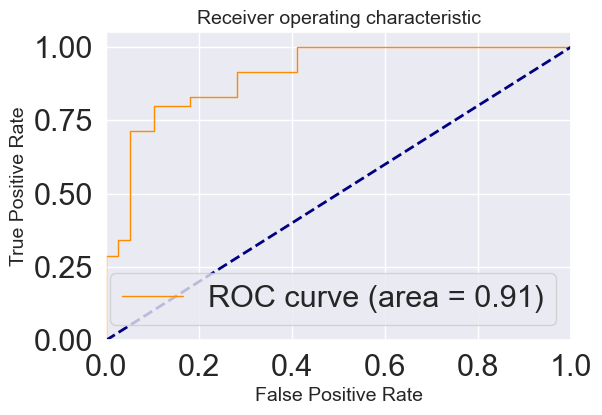

Validation based on KNN
0.7837837837837838
[[32  7]
 [ 9 26]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.79      0.74      0.76        35

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.78      0.78      0.78        74



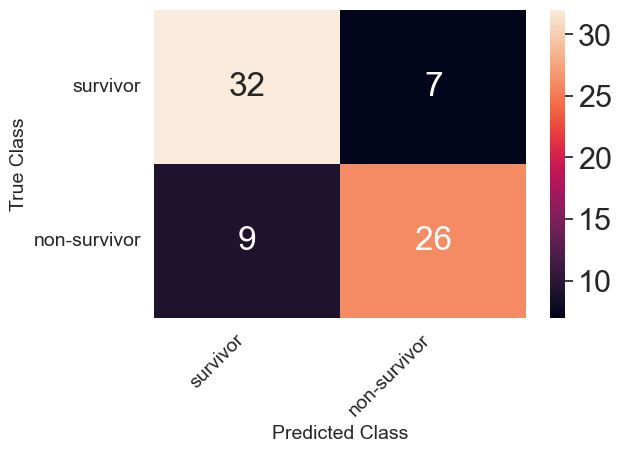

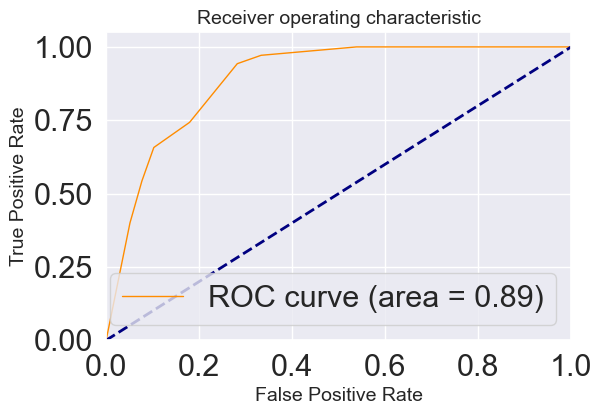

Validation based on DT
0.7837837837837838
[[30  9]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        39
           1       0.76      0.80      0.78        35

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.79      0.78      0.78        74



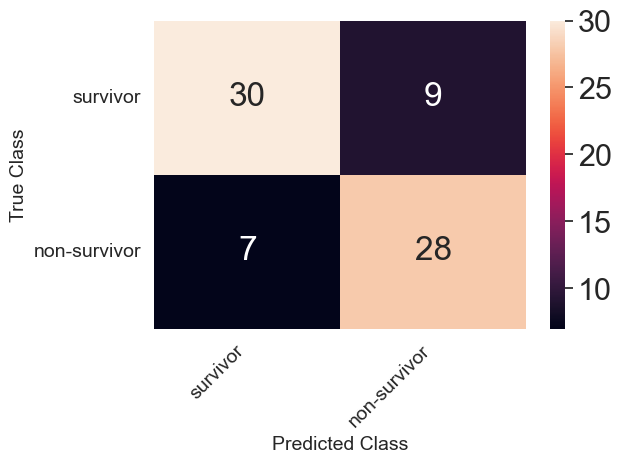

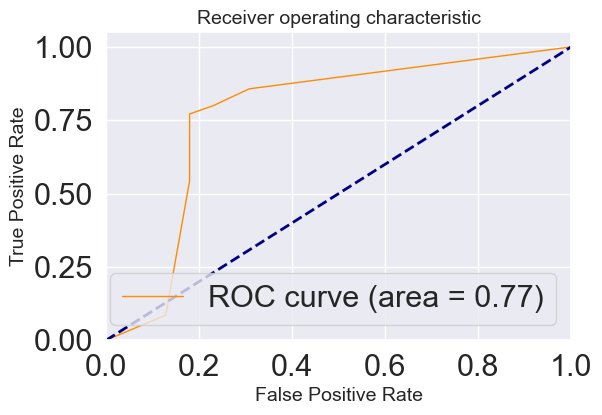

Validation based on GBM
0.8513513513513513
[[33  6]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.83      0.86      0.85        35

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



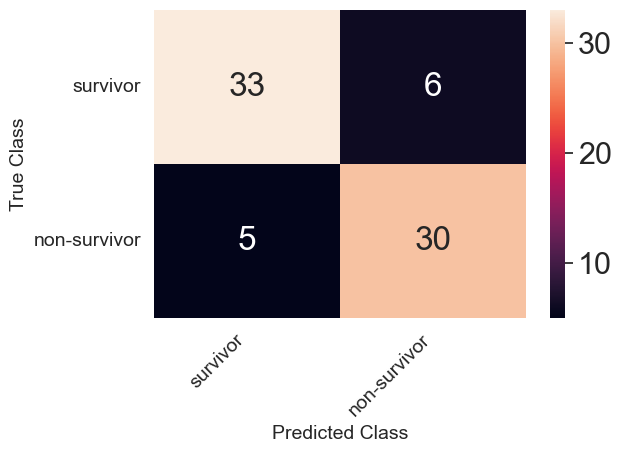

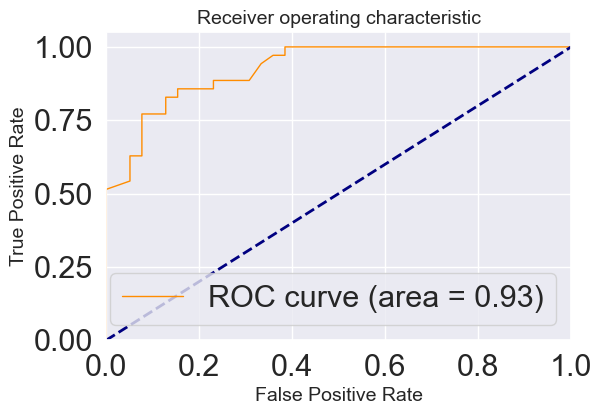

Validation based on RF
0.7972972972972973
[[30  9]
 [ 6 29]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.76      0.83      0.79        35

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



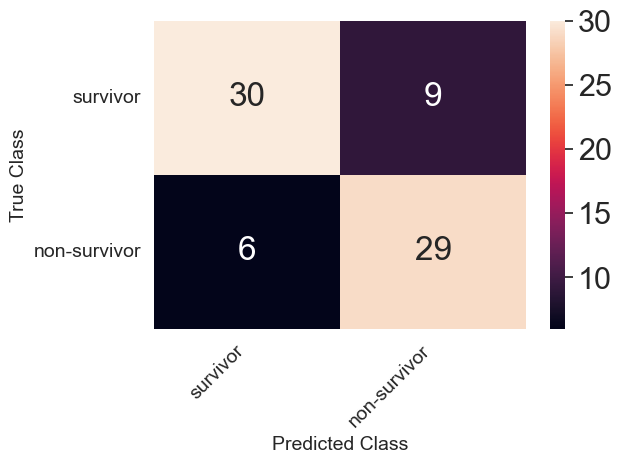

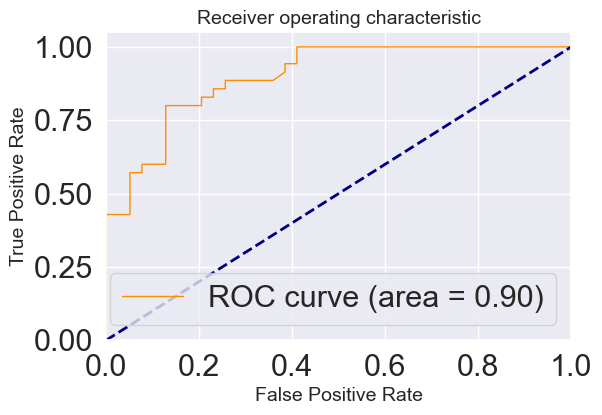

Validation based on XGB
0.8378378378378378
[[33  6]
 [ 6 29]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.83      0.83      0.83        35

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



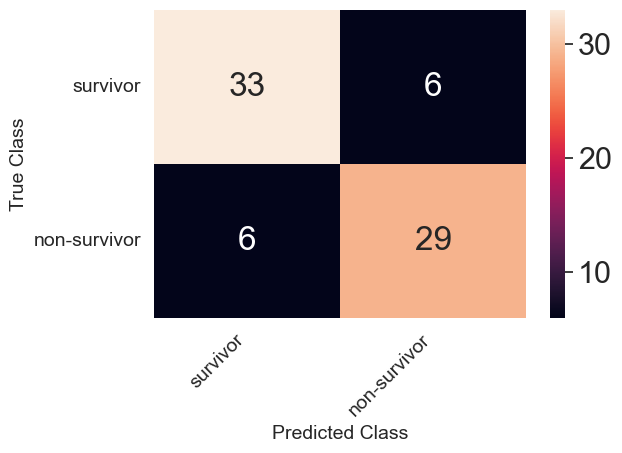

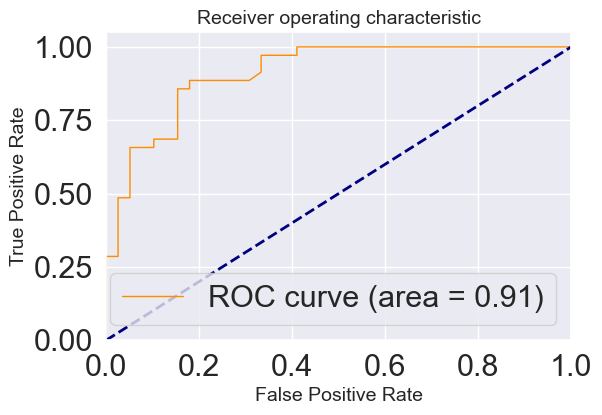

In [69]:
import itertools
import matplotlib.pyplot as plt


def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,3), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Class', fontsize=14)
    plt.xlabel('Predicted Class',fontsize=14)
    set_size(fig)
    return fig

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(1)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.ylabel('True Class', fontsize=34)
    #plt.xlabel('Predicted Class', fontsize=49)
    

def validate_models(training_set, outcome, validation_data, validation_outcome):
    
    models = []
    models.append(('LR', LogisticRegression(C=1.0, penalty='l2')))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
    models.append(('DT', DecisionTreeClassifier(max_depth=5)))
    models.append(('GBM', GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)))
    models.append(('RF', RandomForestClassifier(n_estimators=50, max_depth=5)))
    models.append(('XGB', xgboost.XGBClassifier(colsample_bytree=1, subsample=1, n_estimators=100, min_child_weight=3, max_depth=1, objective='binary:logistic')))

    
    for name, model in models:
        mod = model
        mod.fit(training_set, outcome)
        # estimate accuracy on validation dataset
        predictions = mod.predict(validation_data)
        print ("Validation based on " + name)
        #print "Feature Importance " 
        #print model.feature_importances_
        
        print(accuracy_score(validation_outcome, predictions))
        print(confusion_matrix(validation_outcome, predictions))
        cfmat = confusion_matrix(validation_outcome, predictions)
        #plot_confusion_matrix(cfmat, classes=[0.0, 1.0] , title='confusion matrix')
        print_confusion_matrix(cfmat, ["survivor", "non-survivor"])
        
        print(classification_report(validation_outcome, predictions))

        # calculate the fpr and tpr for all thresholds of the classification
        probs = mod.predict_proba(validation_data)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(validation_outcome, preds)
        roc_auc = auc(fpr, tpr)
        
        lw=2
        fig=plt.figure()
        #plt.rcdefaults() 
        plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.title('Receiver operating characteristic', fontsize=14)
        plt.legend(loc="lower right")
        set_size(fig)
        plt.show()
        
validate_models(X_train, y_train, X_test, y_test)

# Testing on a newly created dataset

In [71]:
# Read Testing Data

df_testing = pd.read_csv('./data/No.Score.Test-2.csv')

In [ ]:
df_testing.head()

,Unnamed: 0,pupID,outcome,age.challenge,sex,chal.time,litterID,chal.status,weight.challenge,dob.pups,v18.hour.post.challenge,v18.weight,v18.energy.high,v18.energy.low,v18.righting.response.high,v18.righting.response.low,v24.hour.post.challenge,v24.weight,v24.energy.high,v24.energy.low,v24.righting.response.high,v24.righting.response.low,weight.change.0.24,weight.change.0.18,weight.change.18.24,direction.of.weight.change.18.24,change.righting.high,change.righting.low,removed
0,111,F1.f.F7.2017-06-19,live,7,f,17:10,F7.2017-06-19,challenged,4.03,6/19/17,18.08,3.84,mobile,non mobile,rights,rights,24.33,3.68,mobile,non mobile,rights,rights,-0.35,-0.19,-0.16,lose,rights.to.rights,rights.to.rights,remove
1,116,F4.m.F7.2017-06-19,live,7,m,17:10,F7.2017-06-19,challenged,3.69,6/19/17,18.08,3.55,mobile,non mobile,rights,rights,24.33,3.40,lethargic,non mobile,rights,rights,-0.29,-0.14,-0.15,lose,rights.to.rights,rights.to.rights,remove
2,33,R2.m.G5.2016-04-08,live,8,m,5:30:00 PM,G5.2016-04-08,challenged,3.43,4/8/16,15.25,3.41,mobile,lethargic,ftr,ftr,25.42,3.55,lethargic,non mobile,rights,rights,0.12,-0.02,0.14,gain,ftr.to.rights,ftr.to.rights,remove
3,97,F2.f.G8.2017-08-02,live,7,f,6:00:00 PM,G8.2017-08-02,non challenged,4.28,8/2/17,18.25,4.30,lethargic,non mobile,rights,rights,23.42,4.45,non mobile,non mobile,rights,rights,0.17,0.02,0.15,gain,rights.to.rights,rights.to.rights,keep
4,37,F2.m.G1.2016-05-08,live,8,m,5:45:00 PM,G1.2016-05-08,challenged,5.00,5/8/16,18.83,4.74,mobile,lethargic,rights,rights,24.17,4.68,mobile,mobile,rights,rights,-0.32,-0.26,-0.06,lose,rights.to.rights,rights.to.rights,remove


In [77]:
import pandas as pd

def preprocess_data(df):
    # 使用正确的参数传递方式
    df = df.drop(columns=['Unnamed: 0', 'pupID', 'chal.time',
                          'litterID', 'dob.pups', 'removed'])
    
    columns_to_encode = ['sex', 'chal.status', 'v18.energy.high', 'v18.energy.low', 'v18.righting.response.high', 'v18.righting.response.low', 'v24.energy.high',
                           'v24.energy.low', 'v24.righting.response.high', 'v24.righting.response.low', 'direction.of.weight.change.18.24', 'change.righting.high', 'change.righting.low']
    df_encoded = pd.get_dummies(df, drop_first=True, columns=columns_to_encode)
    
    # Convert the 'outcome' column to a factorized format
    df_encoded['outcome'] = pd.factorize(df_encoded['outcome'])[0]
    
    # Create our feature matrix
    X = df_encoded.drop(columns='outcome')
    
    # Create our response variable
    y = df_encoded['outcome']
    
    return X, y

# 示例数据加载
# df_testing = pd.read_csv('your_testing_data.csv')
# X2, y2 = preprocess_data(df_testing)

# 确保你已经加载了数据并定义了X_train, y_train
# X_train, y_train = ...

# 调用函数
# stacking_models(X_train, y_train)


In [ ]:
# def preprocess_data(df):
#     df = df.drop(['Unnamed: 0', 'pupID', 'chal.time',
#                   'litterID', 'dob.pups', 'removed'],  1)
#     columns_to_encode = ['sex', 'chal.status', 'v18.energy.high', 'v18.energy.low', 'v18.righting.response.high', 'v18.righting.response.low', 'v24.energy.high',
#                          'v24.energy.low', 'v24.righting.response.high', 'v24.righting.response.low', 'direction.of.weight.change.18.24', 'change.righting.high', 'change.righting.low']
#     df_encoded = pd.get_dummies(df, drop_first=True, columns=columns_to_encode)
#     df_encoded['outcome'] = pd.factorize(df_encoded['outcome'])[0]
#     # Create our feature matrix
#     X = df_encoded.drop('outcome',  axis=1)
#     # create our response variable
#     y = df_encoded['outcome']
#     return X, y

# def preprocess_data(df):

In [78]:
X2,y2 = preprocess_data(df_testing)

In [79]:
X2.head()

,age.challenge,weight.challenge,v18.hour.post.challenge,v18.weight,v24.hour.post.challenge,v24.weight,weight.change.0.24,weight.change.0.18,weight.change.18.24,sex_m,chal.status_non challenged,v18.energy.high_mobile,v18.energy.high_non mobile,v18.energy.low_mobile,v18.energy.low_non mobile,v18.righting.response.high_rights,v18.righting.response.low_rights,v24.energy.high_mobile,v24.energy.high_non mobile,v24.energy.low_mobile,v24.energy.low_non mobile,v24.righting.response.high_rights,v24.righting.response.low_rights,direction.of.weight.change.18.24_lose,change.righting.high_ftr.to.rights,change.righting.high_rights.to.ftr,change.righting.high_rights.to.rights,change.righting.low_ftr.to.rights,change.righting.low_rights.to.ftr,change.righting.low_rights.to.rights
0,7,4.03,18.08,3.84,24.33,3.68,-0.35,-0.19,-0.16,False,False,True,False,False,True,True,True,True,False,False,True,True,True,True,False,False,True,False,False,True
1,7,3.69,18.08,3.55,24.33,3.40,-0.29,-0.14,-0.15,True,False,True,False,False,True,True,True,False,False,False,True,True,True,True,False,False,True,False,False,True
2,8,3.43,15.25,3.41,25.42,3.55,0.12,-0.02,0.14,True,False,True,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,True,False,False
3,7,4.28,18.25,4.30,23.42,4.45,0.17,0.02,0.15,False,True,False,False,False,True,True,True,False,True,False,True,True,True,False,False,False,True,False,False,True
4,8,5.00,18.83,4.74,24.17,4.68,-0.32,-0.26,-0.06,True,False,True,False,False,False,True,True,True,False,True,False,True,True,True,False,False,True,False,False,True


In [80]:
y2 = np.logical_not(y2).astype(int)

In [81]:
selected_features

['weight.change.0.24',
 'weight.change.18.24',
 'v18.righting.response.high_rights',
 'v18.righting.response.low_rights',
 'v24.energy.high_mobile',
 'v24.energy.high_non mobile',
 'v24.energy.low_mobile',
 'v24.energy.low_non mobile',
 'v24.righting.response.high_rights',
 'v24.righting.response.low_rights',
 'direction.of.weight.change.18.24_lose',
 'change.righting.high_rights.to.ftr',
 'change.righting.high_rights.to.rights',
 'change.righting.low_ftr.to.rights',
 'change.righting.low_rights.to.ftr',
 'change.righting.low_rights.to.rights']

In [82]:

X2_subsetted = X2[selected_features]


In [83]:

mod = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=100, max_depth=1)
mod.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [84]:
probs = mod.predict_proba(X2_subsetted)
print (probs)

[[0.19487995 0.80512005]
 [0.25968852 0.74031148]
 [0.04595517 0.95404483]
 [0.21860873 0.78139127]
 [0.08313566 0.91686434]
 [0.3683938  0.6316062 ]
 [0.11862891 0.88137109]
 [0.01755581 0.98244419]
 [0.78028321 0.21971679]
 [0.03821159 0.96178841]
 [0.11200532 0.88799468]
 [0.99115734 0.00884266]
 [0.99019303 0.00980697]
 [0.99115734 0.00884266]
 [0.19641211 0.80358789]
 [0.25189307 0.74810693]
 [0.99115734 0.00884266]
 [0.93276552 0.06723448]
 [0.79923964 0.20076036]
 [0.79269488 0.20730512]
 [0.63281941 0.36718059]]


In [85]:
probability_live =  probs[:,1]
probability_die = probs[:,0]

In [87]:
predicted = mod.predict(X2_subsetted)

In [88]:
result = pd.DataFrame({'Truth': y2, 'Prediction': predicted, 'Probability-Live': probability_live, 'Probability-Die': probability_die})

In [90]:
result.to_csv("predictions_testset_GBM_2025.txt", sep="\t")

In [91]:
# generate evaluation metrics
print( accuracy_score(y2, predicted))
print( roc_auc_score(y2, probs[:, 1]))

0.8095238095238095
0.8727272727272728


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.75      0.90      0.82        10

    accuracy                           0.81        21
   macro avg       0.82      0.81      0.81        21
weighted avg       0.82      0.81      0.81        21



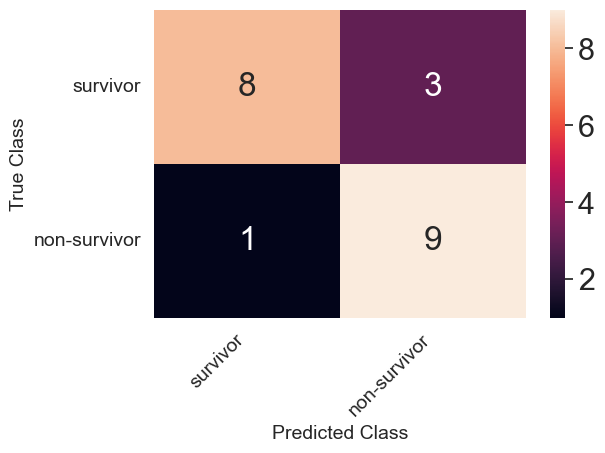

In [92]:
cm_test = confusion_matrix(y2, predicted)
print_confusion_matrix(cm_test, ["survivor", "non-survivor"])
print( classification_report(y2, predicted))

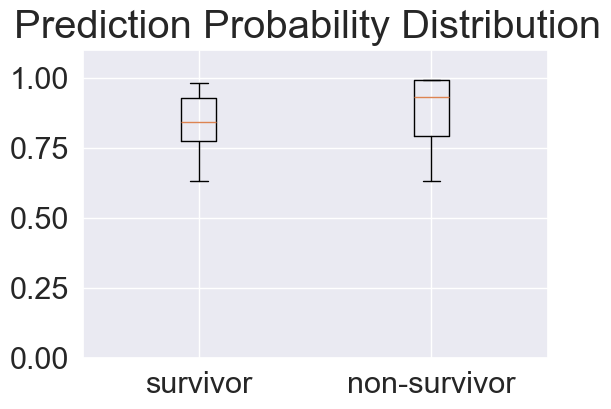

In [93]:
fig = plt.figure()
fig.suptitle('Prediction Probability Distribution')
ax = fig.add_subplot(111)
plt.ylim((0,1.1))
table = [result.loc[result['Probability-Live'] > .5]['Probability-Live'], result.loc[result['Probability-Die'] > .5]['Probability-Die']]
plt.boxplot(table)
ax.set_xticklabels(['survivor', 'non-survivor'])
set_size(fig)
plt.show()